In [ ]:
from pandas import *
from zipfile import ZipFile

dz = ZipFile("/content/archive.zip")
data = read_csv(dz.open("german_credit_data.csv") ,low_memory = False)
data1 = data.copy()

data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [ ]:
#Columns and Rows
print(data.shape)

#The number of null values
print(data.isnull().sum())

#General information about dataset
print(data.info())

(1000, 10)
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB
None


In [ ]:
#The number of null values as percentage
print((data.isnull().sum() / data.shape[0] * 100))

Unnamed: 0           0.0
Age                  0.0
Sex                  0.0
Job                  0.0
Housing              0.0
Saving accounts     18.3
Checking account    39.4
Credit amount        0.0
Duration             0.0
Purpose              0.0
dtype: float64


In [ ]:
data["Checking account"].fillna(data["Checking account"].mode()[0], inplace = True)
data["Saving accounts"].fillna(data["Saving accounts"].mode()[0], inplace = True)

In [ ]:
#The number of null values as percentage after fill process
print((data.isnull().sum() / data.shape[0] * 100))

Unnamed: 0          0.0
Age                 0.0
Sex                 0.0
Job                 0.0
Housing             0.0
Saving accounts     0.0
Checking account    0.0
Credit amount       0.0
Duration            0.0
Purpose             0.0
dtype: float64


In [ ]:
#delete unuseful column(s)
data.drop(columns = "Unnamed: 0", axis = 1, inplace = True)

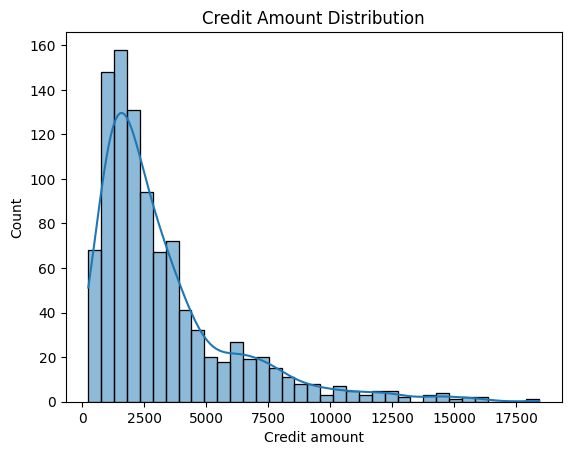

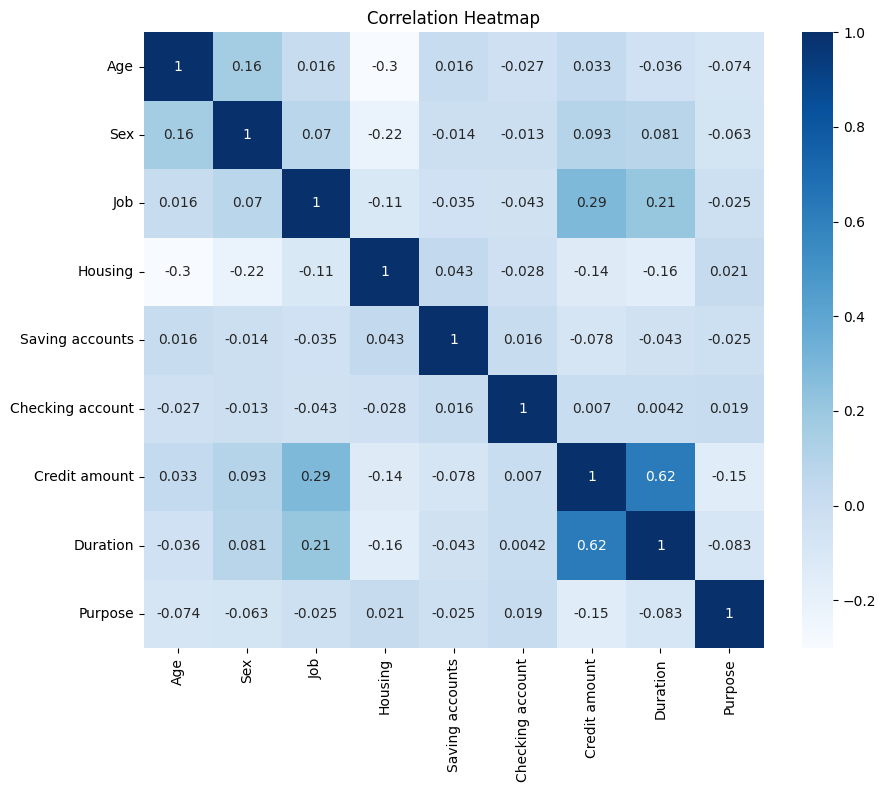

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# "Credit amount" distribution
sns.histplot(data['Credit amount'], kde=True)
plt.title('Credit Amount Distribution')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Apply Encoding to object values
from sklearn.preprocessing import LabelEncoder

for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']:
  le = LabelEncoder()
  data[column] = le.fit_transform(data[column])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Age               1000 non-null   int64
 1   Sex               1000 non-null   int64
 2   Job               1000 non-null   int64
 3   Housing           1000 non-null   int64
 4   Saving accounts   1000 non-null   int64
 5   Checking account  1000 non-null   int64
 6   Credit amount     1000 non-null   int64
 7   Duration          1000 non-null   int64
 8   Purpose           1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Make variables

y = data["Credit amount"] > data['Credit amount'].median()
x = data.drop(columns = ["Credit amount"])

#Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,\
                                                    random_state = 42)

#Standardize
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Train and Predict

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(x_train, y_train)

pred = model.predict(x_test)

In [ ]:
#Evaluate model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cr = classification_report(y_test, pred)
cm = confusion_matrix(y_test, pred)
acs = accuracy_score(y_test, pred)

print(cr)
print(cm)
print(round(acs * 100, 1), "%")

              precision    recall  f1-score   support

       False       0.74      0.80      0.77       155
        True       0.77      0.70      0.73       145

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

[[124  31]
 [ 43 102]]
75.3 %


In [ ]:
#Hyperparamater (Model) tuning
from sklearn.model_selection import GridSearchCV
params = {'C': [0.1, 1, 10],
          'penalty':['l1', 'l2'],
          'solver': ['liblinear']}

gr = GridSearchCV(estimator=model, param_grid = params,cv=5)
gr.fit(x_train, y_train)

print(f"Best Parameters: {grid.best_params_}")

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


In [ ]:
#Model after tuning

model = LogisticRegression(C = 0.1,
                           penalty = 'l2',
                           solver = 'liblinear',
                           random_state=42)

model.fit(x_train, y_train)
predt = model.predict(x_test)

In [ ]:
#Evaluate model again
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

cr = classification_report(y_test, predt)
cm = confusion_matrix(y_test, predt)
acs = accuracy_score(y_test, predt)

print(cr)
print(cm)
print(round(acs * 100, 1), "%")

              precision    recall  f1-score   support

       False       0.73      0.80      0.77       155
        True       0.76      0.69      0.72       145

    accuracy                           0.75       300
   macro avg       0.75      0.74      0.75       300
weighted avg       0.75      0.75      0.75       300

[[124  31]
 [ 45 100]]
74.7 %


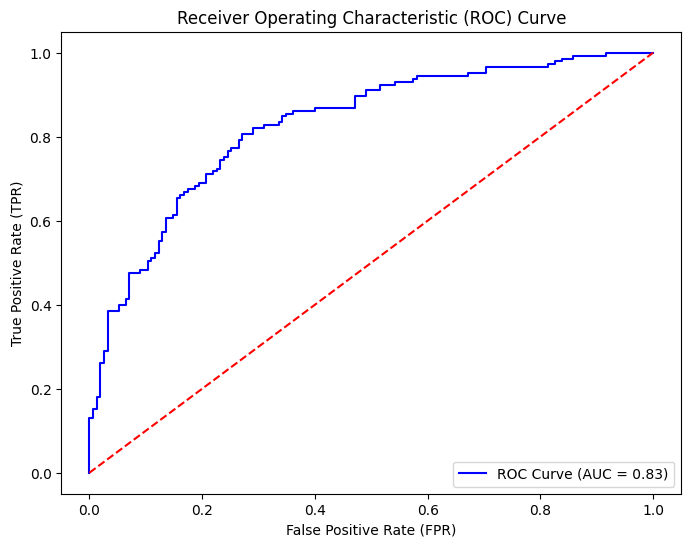

AUC Score: 0.83


In [ ]:
#ROC_AUC curve

from sklearn.metrics import roc_auc_score, roc_curve

prob = model.predict_proba(x_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, c='blue', label=f"ROC Curve (AUC = {roc_auc_score(y_test, prob):.2f})")
plt.plot([0, 1], [0, 1], c='red', linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# 5. Calculate AUC
auc = roc_auc_score(y_test, prob)
print(f"AUC Score: {auc:.2f}")

#Conclusion
"""
the model achieved an accuracy of 75.3% indicating a reasonable performance in predicting credit risk.
, the model performs well overall.
"""